# Experiment №2

## Plan

Аналогично предыдущему эксперименту мы запускаем модель с размером поля 100 на 100 и зерном равынм 2, изменяя 4 параметра:
количество жертв, количество хищников, интервал роста травы и количество травы.
Однако, на основе предыдущих опытов была проведена корректировка иследуемых диапозонов.

In [1]:
import numpy as np

agents1 = np.arange(0, 6001, 300)
agents1[0] = 1
agents1[20] = 5999

agents2 = np.arange(0, 801, 200)
agents2[0] = 1
agents2[4] = 799

intervals = np.arange(0, 71, 7)
intervals[0] = 1

amount = np.arange(0, 201, 25)
amount[0] = 1

print(amount)
print(agents1)
print(agents2)
print(intervals)

[  1  25  50  75 100 125 150 175 200]
[   1  300  600  900 1200 1500 1800 2100 2400 2700 3000 3300 3600 3900 4200
 4500 4800 5100 5400 5700 5999]
[  1 200 400 600 799]
[ 1  7 14 21 28 35 42 49 56 63 70]


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

pltdata = [[],[]]

for a in agents :
    for b in agents:
        if b <= a:
            pltdata[0].append(8000-a)
            pltdata[1].append(b)

fig = plt.figure()
fig.set_size_inches(10, 8)
plt.plot(agents, 8000 - agents, 'b')
plt.plot(pltdata[0], pltdata[1], 'bo')
plt.grid(True)
plt.xlabel("Predators")
plt.ylabel("Preys")
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.show()

In [2]:
from ppmodel import ModelParams

params = []
args = [[],[],[],[]]
for d in agents2:
    for y in agents1:
            for i in intervals:
                for a in amount:
                        args[0].append(d)
                        args[1].append(y)
                        args[2].append(a)
                        args[3].append(i)
                        params.append(ModelParams("S", 100, 100, d, y, a, i, 2))
print(len(params))

10395


In [3]:
import ppmodel

from multiprocessing import Pool 


data = []

if __name__ == '__main__':

    p = Pool(5)

    data = p.map(ppmodel.f, params)

In [4]:
f = open("results_e2.csv", 'w')
for i in range(0, len(data)):
    f.write(str(args[0][i])+','+str(args[1][i])+','+str(args[2][i])+','+str(args[3][i])+','+str(data[i])+"\n")
f.close()

In [2]:
args = [[],[],[],[]]
data = []
file = open("results_e2.csv", 'r')
for line in file:
    parts = line.split(',')
    args[0].append(int(parts[0]))
    args[1].append(int(parts[1]))
    args[2].append(int(parts[2]))
    args[3].append(int(parts[3]))
    data.append(int(parts[4]))

In [3]:
max(data)

15685

In [4]:

for i in range(0, len(data)):
    if data[i] > 7000: 
        index2 = i;
        print(str(args[0][index2])+','+str(args[1][index2])+','+str(args[2][index2])+','+str(args[3][index2])+','+str(data[index2]))

1,300,75,35,7535
1,300,100,42,7550
1,900,75,28,10165
1,900,175,63,7721
1,1200,150,63,9760
1,1500,75,28,7447
1,1800,25,14,9200
1,1800,75,35,8662
1,2100,75,35,9725
1,2400,75,42,10228
1,2400,125,42,10510
1,3300,50,21,9597
1,3600,50,21,10150
1,3600,100,35,12467
1,3900,125,42,8622
1,3900,150,49,8884
1,4200,75,35,15685
200,2100,75,28,7968
200,2100,150,56,9635
200,2700,75,42,7072


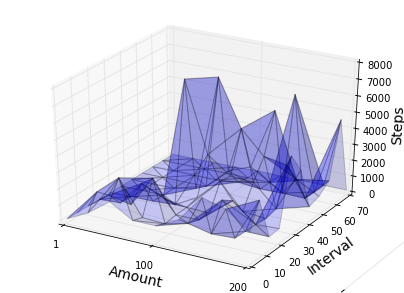

In [9]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

x = []
y = []
z = []
for i in range(0, len(data)):
    if args[0][i] == 1 and args[1][i] == 300:
        x.append(args[2][i])
        y.append(args[3][i])
        z.append(data[i])
        

fig = plt.figure()
fig.set_size_inches(7,5, 5)
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, z, alpha=0.2)
ax.set_xlabel('Amount', fontsize=14)
ax.set_ylabel('Interval', fontsize=14)
ax.set_zlabel('Steps', fontsize=14)
a = ax.xaxis
a.set_ticks([1,100,200,300,400,500])
# ax.tick_params(axis='x', labelsize=24)
plt.show()

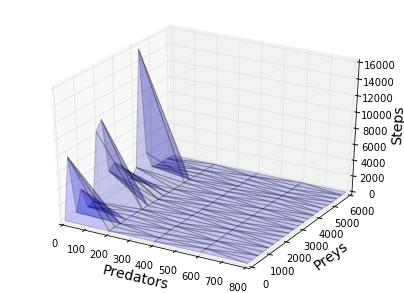

In [12]:
x = []
y = []
z = []
for i in range(0, len(data)):
    if args[2][i] == 75 and args[3][i] == 35:
        x.append(args[0][i])
        y.append(args[1][i])
        z.append(data[i])
        
        
fig = plt.figure()
fig.set_size_inches(7,5, 5)
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, z, alpha=0.2)
ax.set_xlabel('Predators', fontsize=14)
ax.set_ylabel('Preys', fontsize=14)
ax.set_zlabel('Steps', fontsize=14)
plt.show()